In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	965.4132

Best Fitness:	930.9045
Solution:	900.0000
Diff:		30.9045

[0:05:16][----------] 1.96% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	969.1928

Best Fitness:	937.2806
Solution:	900.0000
Diff:		37.2806

[0:10:02][----------] 3.92% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	971.6442

Best Fitness:	941.8259
Solution:	900.0000
Diff:		41.8259

[0:14:43][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	965.5314

Best Fitness:	933.2640
Solution:	900.0000
Diff:		33.2640

[0:19:09][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	964.2163

Best Fitness:	933.1789
Solution:	900.0000
Diff:		33.1789

[0:23:34][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	971.7555

Best Fitness:	942.4602
Solution:	900.0000
Diff:		42.4602

[0:28:24][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.3125

Best Fitness:	936.1041
Solution:	900.0000
Diff:		36.1041

[0:33:05][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	977.5509

Best Fitness:	939.9959
Solution:	900.0000
Diff:		39.9959

[0:37:36][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	972.4283

Best Fitness:	943.8825
Solution:	900.0000
Diff:		43.8825

[0:41:30][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	977.3562

Best Fitness:	945.8180
Solution:	900.0000
Diff:		45.8180

[0:45:23][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.9765

Best Fitness:	926.6210
Solution:	900.0000
Diff:		26.6210

[0:49:21][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	973.6734

Best Fitness:	936.9701
Solution:	900.0000
Diff:		36.9701

[0:52:59][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.3674

Best Fitness:	930.2698
Solution:	900.0000
Diff:		30.2698

[0:56:46][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.2037

Best Fitness:	937.1227
Solution:	900.0000
Diff:		37.1227

[1:00:46][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.8958

Best Fitness:	933.9894
Solution:	900.0000
Diff:		33.9894

[1:04:37][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	965.8391

Best Fitness:	926.1516
Solution:	900.0000
Diff:		26.1516

[1:08:30][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	969.2314

Best Fitness:	936.7997
Solution:	900.0000
Diff:		36.7997

[1:12:21][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.5028

Best Fitness:	926.6085
Solution:	900.0000
Diff:		26.6085

[1:16:14][####------] 35.29% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	966.6237

Best Fitness:	935.0314
Solution:	900.0000
Diff:		35.0314

[1:20:11][####------] 37.25% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	966.6095

Best Fitness:	932.9604
Solution:	900.0000
Diff:		32.9604

[1:23:52][####------] 39.22% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.5721

Best Fitness:	945.0130
Solution:	900.0000
Diff:		45.0130

[1:27:44][####------] 41.18% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.8686

Best Fitness:	941.9186
Solution:	900.0000
Diff:		41.9186

[1:31:38][####------] 43.14% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	964.0336

Best Fitness:	930.7465
Solution:	900.0000
Diff:		30.7465

[1:35:11][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.6845

Best Fitness:	941.2366
Solution:	900.0000
Diff:		41.2366

[1:38:37][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	966.2434

Best Fitness:	928.8130
Solution:	900.0000
Diff:		28.8130

[1:42:00][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.9377

Best Fitness:	945.4433
Solution:	900.0000
Diff:		45.4433

[1:45:33][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	972.8734

Best Fitness:	935.2725
Solution:	900.0000
Diff:		35.2725

[1:48:59][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	972.8434

Best Fitness:	950.1937
Solution:	900.0000
Diff:		50.1937

[1:52:31][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.8796

Best Fitness:	930.0094
Solution:	900.0000
Diff:		30.0094

[1:55:53][######----] 56.86% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	972.8571

Best Fitness:	938.7464
Solution:	900.0000
Diff:		38.7464

[1:59:24][######----] 58.82% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	963.0503

Best Fitness:	937.0348
Solution:	900.0000
Diff:		37.0348

[2:02:47][######----] 60.78% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	971.4570

Best Fitness:	937.5974
Solution:	900.0000
Diff:		37.5974

[2:06:01][######----] 62.75% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	975.8374

Best Fitness:	946.9169
Solution:	900.0000
Diff:		46.9169

[2:09:13][######----] 64.71% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	969.0801

Best Fitness:	941.8373
Solution:	900.0000
Diff:		41.8373

[2:12:25][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	969.2702

Best Fitness:	936.1431
Solution:	900.0000
Diff:		36.1431

[2:15:58][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.6303

Best Fitness:	937.6745
Solution:	900.0000
Diff:		37.6745

[2:19:17][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	971.5219

Best Fitness:	938.3926
Solution:	900.0000
Diff:		38.3926

[2:22:25][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	974.4590

Best Fitness:	936.2249
Solution:	900.0000
Diff:		36.2249

[2:25:18][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	969.7559

Best Fitness:	936.9194
Solution:	900.0000
Diff:		36.9194

[2:28:18][########--] 76.47% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.5526

Best Fitness:	936.4880
Solution:	900.0000
Diff:		36.4880

[2:31:08][########--] 78.43% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	972.5805

Best Fitness:	941.7125
Solution:	900.0000
Diff:		41.7125

[2:34:10][########--] 80.39% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	966.3743

Best Fitness:	931.5012
Solution:	900.0000
Diff:		31.5012

[2:37:04][########--] 82.35% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	972.6968

Best Fitness:	934.1145
Solution:	900.0000
Diff:		34.1145

[2:40:09][########--] 84.31% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	972.4791

Best Fitness:	929.8608
Solution:	900.0000
Diff:		29.8608

[2:43:02][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.5611

Best Fitness:	937.5650
Solution:	900.0000
Diff:		37.5650

[2:45:58][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	973.4328

Best Fitness:	937.9686
Solution:	900.0000
Diff:		37.9686

[2:48:53][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.2989

Best Fitness:	931.8690
Solution:	900.0000
Diff:		31.8690

[2:51:50][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	967.6936

Best Fitness:	937.1329
Solution:	900.0000
Diff:		37.1329

[2:54:57][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	969.8209

Best Fitness:	939.2973
Solution:	900.0000
Diff:		39.2973

[2:57:51][##########] 96.08% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.2537

Best Fitness:	936.1010
Solution:	900.0000
Diff:		36.1010

[3:00:47][##########] 98.04% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	970.1741

Best Fitness:	939.2169
Solution:	900.0000
Diff:		39.2169

[3:03:51][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:03:51

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
126,81.425671,76.009522,64.655324,60.830017,55.228595,78.246745,74.822689,75.674326,58.146429,68.254766,...,65.910069,68.889479,58.14811,55.314533,75.674299,90.189487,76.70045,81.418926,74.28079,50
127,81.425671,76.009522,64.655324,60.830017,55.228595,78.246745,74.822689,75.674326,58.146429,68.254766,...,65.910069,68.889479,58.14811,55.314533,75.674299,90.189487,76.70045,81.418926,74.28079,50
128,81.425671,76.009522,64.655324,60.830017,55.228595,78.246745,74.822689,75.674326,58.146429,68.254766,...,65.910069,68.889479,58.14811,55.314533,75.674299,90.189487,76.70045,81.418926,74.28079,50
129,81.425671,76.009522,64.655324,60.830017,55.228595,78.246745,74.822689,75.674326,58.146429,68.254766,...,65.910069,68.889479,58.14811,55.314533,75.674299,90.189487,76.70045,81.418926,74.28079,50
130,81.425671,76.009522,64.655324,60.830017,55.228595,78.246745,74.822689,75.674326,58.146429,68.254766,...,65.910069,68.889479,58.14811,55.314533,75.674299,90.189487,76.70045,81.418926,74.28079,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 30.90454602588568

Best error for run 1: 37.28061851991856

Best error for run 2: 41.825902622085096

Best error for run 3: 33.26400925187852

Best error for run 4: 33.178900206400385

Best error for run 5: 42.460171074730624

Best error for run 6: 36.104119738747386

Best error for run 7: 39.995872313169116

Best error for run 8: 43.882516612889845

Best error for run 9: 45.81804325818837

Best error for run 10: 26.6210034098832

Best error for run 11: 36.9701281645157

Best error for run 12: 30.2698098862611

Best error for run 13: 37.1226801306226

Best error for run 14: 33.989369544190026

Best error for run 15: 26.15155117100437

Best error for run 16: 36.799723993983434

Best error for run 17: 26.608465473747856

Best error for run 18: 35.03142954971065

Best error for run 19: 32.96041006507028

Best error for run 20: 45.01301684889188

Best error for run 21: 41.91859752161622

Best error for run 22: 30.746516316724524

Best error for run 23: 41.23656041648758

Best error for run 24: 28.81296208089907

Best error for run 25: 45.44331067921644

Best error for run 26: 35.272530413988534

Best error for run 27: 50.19367469459246

Best error for run 28: 30.009437790811717

Best error for run 29: 38.746390885507026

Best error for run 30: 37.034794898744394

Best error for run 31: 37.59738297528486

Best error for run 32: 46.91689259274767

Best error for run 33: 41.837322623489854

Best error for run 34: 36.143083531772845

Best error for run 35: 37.674454395165185

Best error for run 36: 38.39264839382702

Best error for run 37: 36.22490934948269

Best error for run 38: 36.919389722386086

Best error for run 39: 36.48796919440906

Best error for run 40: 41.712549470764884

Best error for run 41: 31.501184886518445

Best error for run 42: 34.114451395809965

Best error for run 43: 29.860797347599487

Best error for run 44: 37.5649953632892

Best error for run 45: 37.9686004834449

Best error for run 46: 31.869011632593583

Best error for run 47: 37.132938263624055

Best error for run 48: 39.29734866774356

Best error for run 49: 36.101049132857725

Best error for run 50: 39.216902935248186

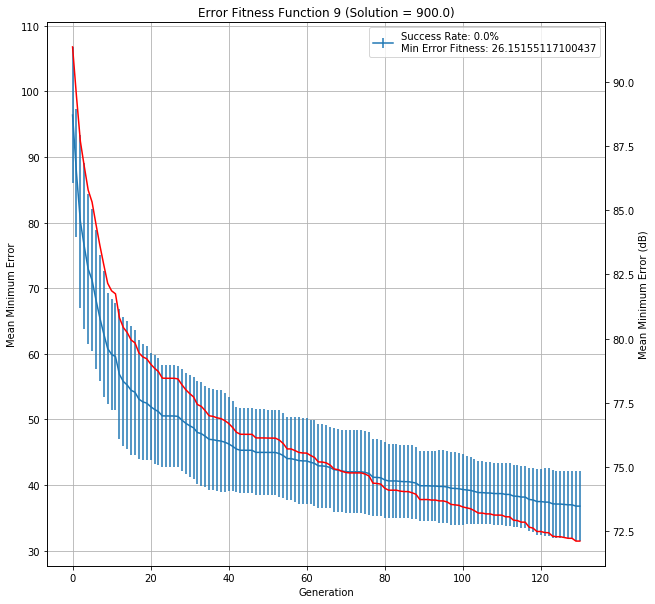

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.4,30.904546,37.280619,41.825903,33.264009,33.1789,42.460171,...,37.564995,37.9686,31.869012,37.132938,39.297349,36.101049,39.216903,36.788254,3:03:51,39900
